In [1]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm
import time
import Functions

import matplotlib.pyplot as plt

In [2]:
EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

In [3]:
FolderPath = '/global/cscratch1/sd/lianming/Results/Tati'
TargetFolderPath = '/global/cscratch1/sd/lianming/Results'

In [12]:
FileNames = os.listdir(FolderPath)
FileNames.sort()

if '.ipynb_checkpoints' in FileNames:
    FileNames.remove('.ipynb_checkpoints')

FileNames

['ProbCube_0110_1404__SNII-NMF.pkl',
 'ProbCube_0110_1405__SNII-Templates.pkl',
 'ProbCube_0110_1414__SNIIn.pkl',
 'ProbCube_0110_1419__SNII-NMF.pkl',
 'ProbCube_0110_1421__SNII-Templates.pkl',
 'ProbCube_0110_1423__SLSN-I.pkl',
 'ProbCube_0110_1427__SNIIn.pkl',
 'ProbCube_0110_1430__PISN.pkl',
 'ProbCube_0110_1433__RRL.pkl',
 'ProbCube_0110_1439__SLSN-I.pkl',
 'ProbCube_0110_1445__PISN.pkl',
 'ProbCube_0110_1447__RRL.pkl',
 'ProbCube_0110_2236__SNII-NMF.pkl',
 'ProbCube_0110_2237__SNII-Templates.pkl',
 'ProbCube_0110_2240__SNII-NMF.pkl',
 'ProbCube_0110_2241__SNII-Templates.pkl',
 'ProbCube_0110_2246__SNIIn.pkl',
 'ProbCube_0110_2252__SNIIn.pkl',
 'ProbCube_0110_2257__SLSN-I.pkl',
 'ProbCube_0110_2302__SLSN-I.pkl',
 'ProbCube_0110_2304__PISN.pkl',
 'ProbCube_0110_2304__RRL.pkl',
 'ProbCube_0110_2310__PISN.pkl',
 'ProbCube_0110_2312__RRL.pkl']

(-5.0, 8.0)

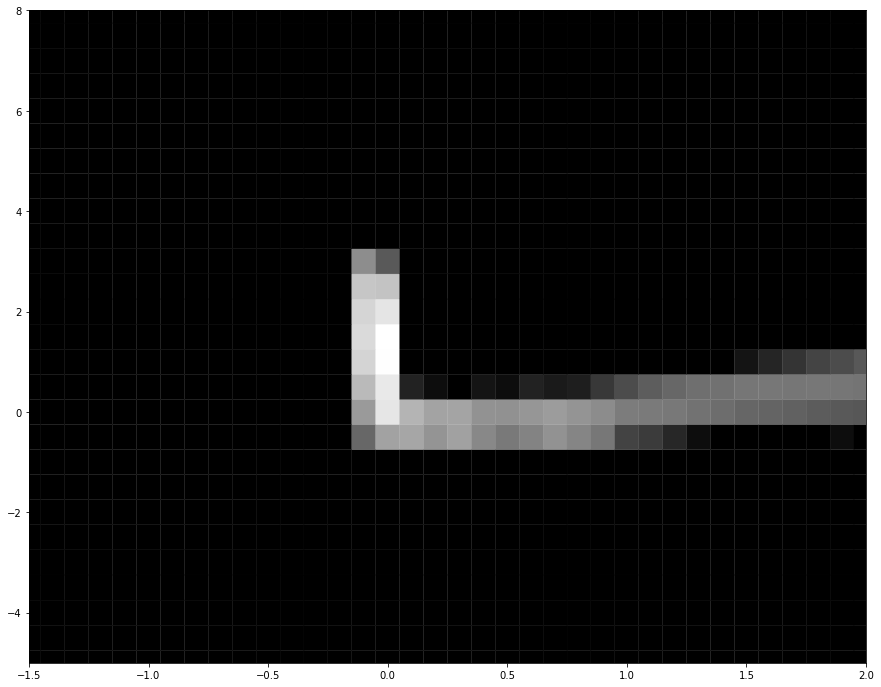

In [36]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(Cube, InfoDict, 'g', 'i', 480, 1440)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
plt.xlim([-1.5, 2])
plt.ylim([-5, 8])
# plt.axis('equal')

In [42]:
for EventName in EventNames:
    
    InfoDict = 0
    Cube = 0
    
    for FileName in FileNames:
        
        if EventName not in FileName:
            continue
            
        FilePath = os.path.join(FolderPath, FileName) 

        if InfoDict == 0:                

            with open(FilePath, 'rb') as f:
                InfoDict = pickle.load(f)
                Cube = pickle.load(f)

        else:
            with open(FilePath, 'rb') as f:
                infoDict = pickle.load(f)
                Cube += pickle.load(f)

                InfoDict['ObjectNo'] += infoDict['ObjectNo']
                InfoDict['dMagRange'] = [ min( InfoDict['dMagRange'][0], infoDict['dMagRange'][0] ) , max( InfoDict['dMagRange'][1], infoDict['dMagRange'][1] ) ]
                InfoDict['ColorRange'] = [ min( InfoDict['ColorRange'][0], infoDict['ColorRange'][0] ) , max( InfoDict['ColorRange'][1], infoDict['ColorRange'][1] ) ]
    
    if InfoDict == 0:
        continue
                    
    FileName = 'ProbCube_' + time.strftime('%m%d_%H%M') + '__' + EventName + '.pkl'

    FilePath = os.path.join(TargetFolderPath, FileName)
    FilePath0 = FilePath

    ii = 1
    while os.path.exists(FilePath):
        FilePath = FilePath0[:-4] + '('+str(ii)+')' + '.pkl'
        ii += 1

    with open(FilePath, 'wb') as f:
        pickle.dump(InfoDict, f)
        pickle.dump(Cube, f ) 
        
    print('|', end='')
    
print('\nFinish!')
        


||||||
Finish!


In [33]:
InfoDict

{'EventName': 'SNII-NMF',
 'PointsPerDay': 1,
 'ObjectNo': 10000,
 'BandPairs': ['ug',
  'ur',
  'ui',
  'uz',
  'gu',
  'gr',
  'gi',
  'gz',
  'gy',
  'ru',
  'rg',
  'ri',
  'rz',
  'ry',
  'iu',
  'ig',
  'ir',
  'iz',
  'iy',
  'zu',
  'zg',
  'zr',
  'zi',
  'zy',
  'yg',
  'yr',
  'yi',
  'yz'],
 'dT1s': array([-480, -465, -450, -435, -420, -405, -390, -375, -360, -345, -330,
        -315, -300, -285, -270, -255, -240, -225, -210, -195, -180, -165,
        -150, -135, -120, -105,  -90,  -75,  -60,  -45,  -30,  -15,    0,
          15,   30,   45,   60,   75,   90,  105,  120,  135,  150,  165,
         180,  195,  210,  225,  240,  255,  270,  285,  300,  315,  330,
         345,  360,  375,  390,  405,  420,  435,  450,  465,  480]),
 'dT2s': array([-1920, -1890, -1860, -1830, -1800, -1770, -1740, -1710, -1680,
        -1650, -1620, -1590, -1560, -1530, -1500, -1470, -1440,  -480,
         -450,  -420,  -390,  -360,  -330,  -300,  -270,  -240,  -210,
         -180,  -150,  -120

In [31]:
InfoDict

{'EventName': 'PISN',
 'PointsPerDay': 1,
 'ObjectNo': 10000,
 'BandPairs': ['ug',
  'ur',
  'ui',
  'uz',
  'gu',
  'gr',
  'gi',
  'gz',
  'gy',
  'ru',
  'rg',
  'ri',
  'rz',
  'ry',
  'iu',
  'ig',
  'ir',
  'iz',
  'iy',
  'zu',
  'zg',
  'zr',
  'zi',
  'zy',
  'yg',
  'yr',
  'yi',
  'yz'],
 'dT1s': array([-480, -465, -450, -435, -420, -405, -390, -375, -360, -345, -330,
        -315, -300, -285, -270, -255, -240, -225, -210, -195, -180, -165,
        -150, -135, -120, -105,  -90,  -75,  -60,  -45,  -30,  -15,    0,
          15,   30,   45,   60,   75,   90,  105,  120,  135,  150,  165,
         180,  195,  210,  225,  240,  255,  270,  285,  300,  315,  330,
         345,  360,  375,  390,  405,  420,  435,  450,  465,  480]),
 'dT2s': array([-1920, -1890, -1860, -1830, -1800, -1770, -1740, -1710, -1680,
        -1650, -1620, -1590, -1560, -1530, -1500, -1470, -1440,  -480,
         -450,  -420,  -390,  -360,  -330,  -300,  -270,  -240,  -210,
         -180,  -150,  -120,   

In [35]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):
    
    if abs(dT1) > abs(dT1-dT2):
        dT1, dT2 = dT1-dT2, -dT2    

    Ind1 = InfoDict['BandPairs'].index(Band1+Band2)
    
    dT1grid = InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ]
    dT2grid = InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ]
    
    TimePairGrid = [ InfoDict['dT1s'][ abs( dT1 - InfoDict['dT1s'] ).argmin() ], InfoDict['dT2s'][ abs( dT2 - InfoDict['dT2s'] ).argmin() ] ]
    
    Ind2 = np.where( (InfoDict['TimePairs'] == TimePairGrid ).all(axis=1) )[0][0]
    
    Results = HashTable[Ind1, Ind2]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

In [6]:
dT1s = np.arange(-480, 481, 15)
dT2s = np.hstack(( np.arange(-1920, -1439, 30), np.arange(-480, 481, 30), np.arange(1440, 1921, 30) )) 

In [30]:
dT1s = np.arange(60, 120, 15)
dT2s = np.arange(450, 510, 15)

In [31]:
TimePairs = [ [ii, jj] for ii in dT1s for jj in dT2s if abs(ii) <= abs(ii-jj) ]

In [32]:
len(TimePairs)

16